In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("stopwords")
import re
import string
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alenl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [42]:
try:
    df=pd.read_csv('UpdatedResume_DataSet.csv',encoding='utf-8')
except UnicodeDecodeError:
    df=pd.read_csv('UpdatedResume_DataSet.csv',encoding='latin-1')

In [43]:
df.head(6)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â?¢ R â?¢ Python â?¢ SAP HANA â?¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."


In [44]:
df.sample(7)

,Category,Resume
257,Sales,KEY SKILLS: â?¢ Planning & Strategizing â?¢ Pr...
118,Arts,"Additional qualifications April 2000, Web Desi..."
785,ETL Developer,TechnicalProficiencies DB: Oracle 11g Domains:...
397,Java Developer,"Operating Systems Windows XP, 7, 10. Tools/Pac..."
170,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
888,Blockchain,Skills Strong CS fundamentals and problem solv...
916,Testing,â? Willingness to accept the challenges. â? ...


In [45]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [46]:
df.sort_values(by='Category')

,Category,Resume
86,Advocate,Education Details \n LLB. Dibrugarh Universi...
103,Advocate,â?¢ Hard working â?¢ Quick learnerEducation De...
102,Advocate,Good grasping quality and skillful work Educat...
101,Advocate,Skills Legal Writing Efficient researcher Lega...
100,Advocate,Skills: Natural Languages: Proficient in Engli...
...,...,...
157,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
158,Web Designing,Education Details \nJanuary 2016 B.Sc. Informa...
159,Web Designing,"IT SKILLS Languages: C (Basic), JAVA (Basic) W..."
149,Web Designing,"IT SKILLS Languages: C (Basic), JAVA (Basic) W..."


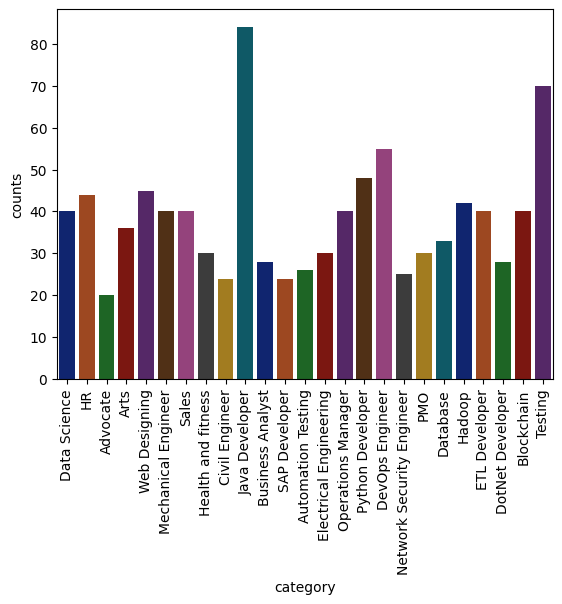

In [47]:
plt.Figure(figsize=(35,25))
sns.countplot(x=df['Category'],palette='dark')
plt.xlabel('category')
plt.ylabel('counts')
plt.tick_params(axis='x')
plt.tick_params(axis='y')
plt.xticks(rotation=90)
plt.show()

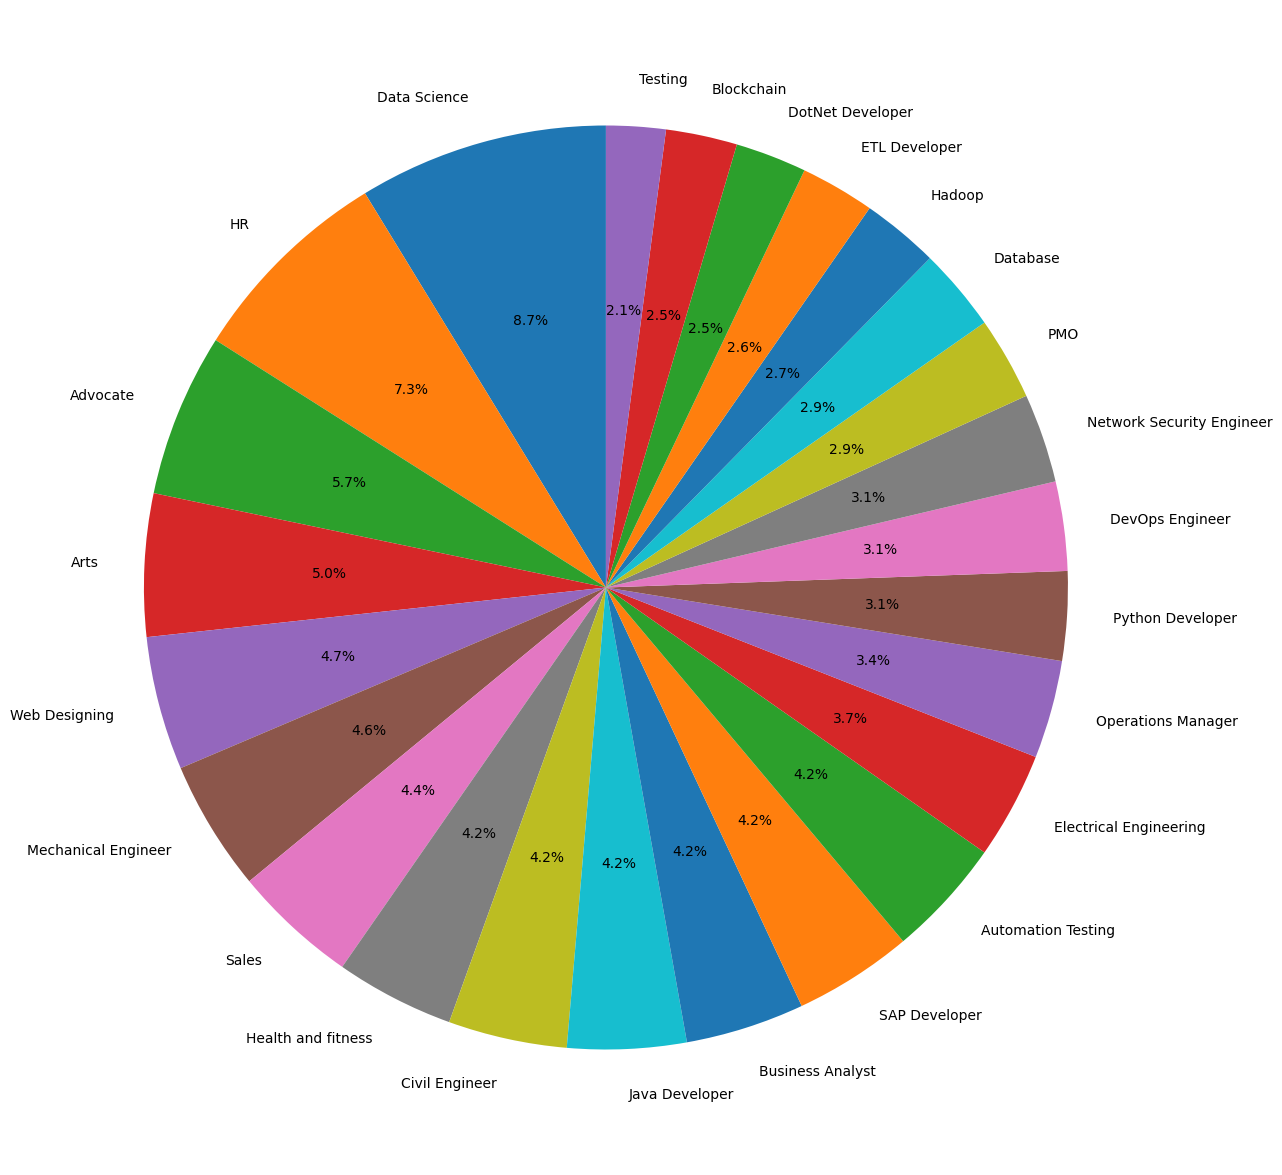

In [48]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,15))
plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90)
plt.show()

In [49]:
df['Resume'][5]

"SKILLS C Basics, IOT, Python, MATLAB, Data Science, Machine Learning, HTML, Microsoft Word, Microsoft Excel, Microsoft Powerpoint. RECOGNITION Academic Secured First place in B.Tech.Education Details \nAugust 2014 to May 2018 B.Tech.  Ghatkesar, Andhra Pradesh Aurora's Scientific and Technological Institute\nJune 2012 to May 2014  Secondary Education Warangal, Telangana SR Junior College\nData Science \n\n\nSkill Details \nMS OFFICE- Exprience - Less than 1 year months\nC- Exprience - Less than 1 year months\nmachine learning- Exprience - Less than 1 year months\ndata science- Exprience - Less than 1 year months\nMatlab- Exprience - Less than 1 year monthsCompany Details \ncompany - \ndescription - "

In [50]:
def preprocessing(txt):
    txt=txt.lower()
    txt=txt.translate(str.maketrans(' ',' ',string.punctuation))#remove punctuations
    stop_words=stopwords.words('english')#stop words
    txt=' '.join([word for word in txt.split() if word not in stop_words])

    txt=' '.join(txt.split())#remove white space
    return txt


In [51]:
#EXAMPLE TO CHECK THE WORKING

example_text="The quick brown fox, named @Charlie, is jumping over the lazy dogs #everyday!"
cleansed_text=preprocessing(example_text)
print(cleansed_text)

quick brown fox named charlie jumping lazy dogs everyday


In [52]:

def clean_resume(text):
    text=preprocessing(text)
    cleanText = re.sub('http\S+\s', ' ', text)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [53]:
df['Resume']=df['Resume'].apply(lambda x: clean_resume(x))
df['Resume']

0      skills programming languages python pandas num...
1      education details may 2013 may 2017 uitrgpv da...
2      areas interest deep learning control system de...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient ms office word basi...
958     willingness a ept challenges positive thinkin...
959    personal skills quick learner eagerness learn ...
960    computer skills software knowledge mspower poi...
961    skill set os windows xp788110 database mysql s...
Name: Resume, Length: 962, dtype: object

In [55]:
le = LabelEncoder()
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])


In [54]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [56]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [62]:
tfidf=TfidfVectorizer()#(stop_words='english')can be used if there is any stopwords even after the stopword removal is done
tfidf.fit(df.Resume)
required_text=tfidf.transform(df.Resume)

In [69]:
x=required_text
y=df['Category']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=41)


In [71]:
x_test.shape

(481, 7980)

In [72]:
y_test.shape

(481,)

In [81]:
# KNN model with OneVsRest

clf=OneVsOneClassifier(KNeighborsClassifier())
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score_knn=metrics.accuracy_score(y_test,y_pred)
score_knn

0.9438669438669439

In [88]:
# Logistic Regression model with OneVsRest

model =OneVsOneClassifier(LogisticRegression())
model.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score_logi=metrics.accuracy_score(y_test,y_pred)
score_logi

0.9438669438669439

In [94]:
#cross validation with knn and logistic regression

#KNN

knn_cv_scores = cross_val_score(clf, x_train, y_train, cv=6)
knn_train_acc=clf.score(x_train,y_train)
knn_test_acc=clf.score(x_test,y_test)
print("cross validation score of knn: ",knn_cv_scores.mean())
print("accuracy score in train data: ",knn_train_acc)
print("accuracy score in test data: ",knn_test_acc)

#logistic

log_cv_scores = cross_val_score(model, x_train, y_train, cv=6)
log_train_acc=model.score(x_train,y_train)
log_test_acc=model.score(x_test,y_test)
print("cross validation score of log: ",log_cv_scores.mean())
print("accuracy score in train data: ",log_train_acc)
print("accuracy score in test data: ",log_test_acc)

cross validation score of knn:  0.9252314814814815
accuracy score in train data:  0.972972972972973
accuracy score in test data:  0.9438669438669439
cross validation score of log:  0.8959876543209878
accuracy score in train data:  0.9875259875259875
accuracy score in test data:  0.9334719334719335


In [95]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [103]:
df.Resume[120]

'education details august 2018 january 2021 entermediate maths mumbai maharashtra sunbeam academy samne ghat varanasi martial arts fitness job skill details company details company sports authority description 2nd dan black belt karate martial arts searching personal trainer job fitness 3 gold medals national karate championship 7 gold medals state karate championship 3 times best player year uttar pradesh award represented india selected world karate championship held croatia europe '

In [105]:
myresume ='''''education details august 2018 january 2021 entermediate maths mumbai maharashtra sunbeam academy samne ghat varanasi martial arts fitness job skill details company details company sports authority description 2nd dan black belt karate martial arts searching personal trainer job fitness 3 gold medals national karate championship 7 gold medals state karate championship 3 times best player year uttar pradesh award represented india selected world karate championship held croatia europe '''

In [106]:
# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))
# Clean the input resume
cleaned_resume = clean_resume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
     4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Arts
1
